In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load train and test data

In [2]:
from proj1_helpers import *
from data_helpers import *
from implementations import ridge_regression
from cost import compute_loss


### Load train and test data

In [4]:
# Data paths
DATA_TRAIN_PATH = "../data/train.csv"

# Load data
Y, X, id_train = load_csv_data(DATA_TRAIN_PATH)

### Get index for the three different jet groups

In [5]:
jet_train_samples = get_jet_samples(X)

### Define parameters

In [6]:
degrees = range(1,20)
lambda_test = 1e-3
lambdas = np.logspace(-8,-2,7)
k_fold = 4
seed = 2
degrees, lambdas

(range(1, 20), array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02]))

## Group 1

In [7]:
# get train and test data
train_index = jet_train_samples[1]
x, y = X[train_index], Y[train_index]

### Best degree

In [8]:
acc_training = []
acc_validation = []

for degree in degrees:
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean,x_val_clean = clean_data(x_train, x_val)
            
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_test)
            
            acc_tr = predict_accuracy(y_train, x_train_aug, w)
            acc_val = predict_accuracy(y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(degree, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))

/Users/Sofia/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


1 71.0736270160597 71.02806148767151
2 75.60825681763473 75.60481790983184
3 76.59479349358644 76.5552460538533
4 77.67933904192029 77.63076446920458
5 78.1070531999037 77.99571855978542
6 78.49736923553078 78.38517486846177
7 79.28101035111249 79.18730011348396
8 79.99243440283365 79.94300010316724
9 80.31655146325527 80.15578252347055
10 80.31311255545239 80.09646136387083
11 80.46055572750095 80.31698132673063
12 80.63551016197255 80.4601258640256
13 74.60710478352075 74.56024966470648
14 76.1606313834726 75.94526978231714
15 80.36684548987242 80.09388218301868
16 76.54621892087073 76.44949963891467
17 78.47372674438598 78.20205302795831
18 77.82119398878916 77.65784586815228
19 79.6365074452354 79.56643969875168


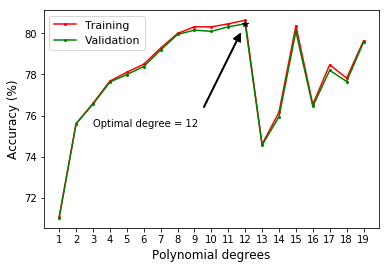

In [10]:
max_accuracy = np.amax(acc_validation)
best_degree = degrees[np.argmax(acc_validation)]

fig,ax = plt.subplots(1,1)

plt.plot(degrees, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.plot(degrees, acc_validation, label='Validation', marker = "o", markersize = 2, color = "green")
ax.annotate('Optimal degree = %d' %(best_degree), xy=(best_degree, max_accuracy), xytext=(best_degree-9, max_accuracy-5),
            arrowprops=dict(facecolor='black',width=1,headwidth=8,headlength=8,shrink=0.1))
plt.plot(best_degree, max_accuracy, marker = '*', markersize=6, color = "black")
plt.xticks(degrees)
plt.xlabel("Polynomial degrees", fontsize = 12)
plt.ylabel("Accuracy (%)",  fontsize = 12)
#plt.title("Cross validation for Group 0")
plt.legend(fontsize=11)
plt.savefig("degree_group1.eps")
plt.show()

### Best lambda

In [12]:
acc_training = []
acc_validation = []

for ind_lambda,lambda_ in enumerate(lambdas):
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean,x_val_clean = clean_data(x_train, x_val)
            
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, best_degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, best_degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_)
            
            acc_tr = predict_accuracy(y_train, x_train_aug, w)
            acc_val = predict_accuracy(y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(lambda_, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))

/Users/Sofia/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


1e-08 80.61401698820455 80.44336118848653
1e-07 80.63594002544792 80.44207159806047
1e-06 80.62347398466248 80.44207159806047
1e-05 80.37372330547818 80.16738883730528
0.0001 80.63551016197255 80.42143815124317
0.001 80.63551016197255 80.4601258640256
0.01 80.2546511228034 80.1183844011142


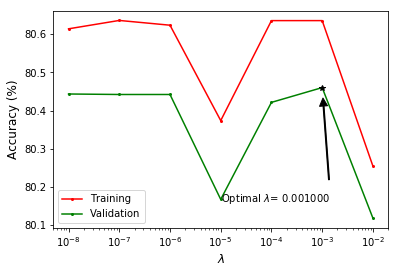

In [16]:
max_accuracy = np.amax(acc_validation)
best_lambda = lambdas[np.argmax(acc_validation)]

plt.semilogx(lambdas, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.semilogx(lambdas, acc_validation, label='Validation', marker = "o", markersize = 2, color = "green")
plt.semilogx(best_lambda, max_accuracy, marker = '*', markersize=6, color = "black")
plt.annotate('Optimal $\lambda$= %f' %(best_lambda), xy=(best_lambda, max_accuracy), xytext=(best_lambda *1e-2, max_accuracy-0.3),
            arrowprops=dict(facecolor='black',width=1,headwidth=8,headlength=8,shrink=0.1))
plt.xlabel("$\lambda$", fontsize = 12)
plt.ylabel("Accuracy (%)", fontsize = 12)
#plt.title("Cross validation for Group 0")
plt.legend()
plt.savefig("lambda_group1.eps")
plt.show()